### 1. Load the dataset

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler



# read csv file
df = pd.read_csv('/content/Mall Customers.csv', sep=',', header='infer')




In [2]:
df.head()

,CustomerID,Gender,Age,Education,Marital Status,Annual Income (k$),Spending Score (1-100)
0,1,M,19,High School,Married,15,39
1,2,M,21,Graduate,Single,15,81
2,3,F,20,Graduate,Married,16,6
3,4,F,23,High School,Unknown,16,77
4,5,F,31,Uneducated,Married,17,40


In [3]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values


### Data Visualization

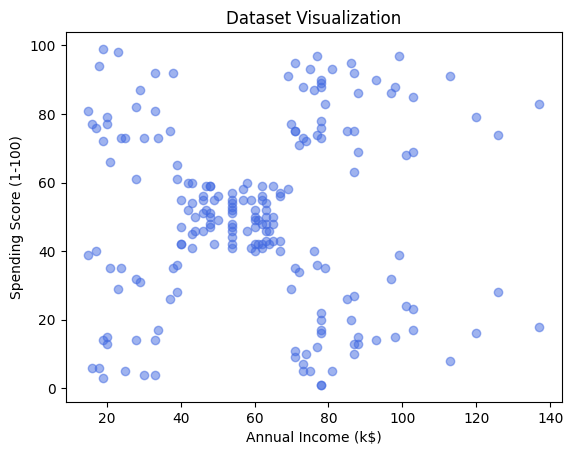

In [4]:
from sklearn.cluster import KMeans
from sklearn import metrics

# Visualizing the data
plt.scatter(X[:, 0], X[:, 1], marker='o', alpha=0.5, color='royalblue')
plt.title('Dataset Visualization')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

### 2A. Determine Number of Clusters - Elbow Method
#### Clustering will be done based on two features: "Annual Income (k$)" and "Spending Score (1-100)"

In [6]:
# get the features we want the data to be clustered on
X = df.iloc[:, [5, 6]].values

#standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
X_scaled.shape

(200, 2)

### fit the K-means model for different values of k (number of clusters) and calculate both the distortion and inertia for each value.

In [8]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42).fit(X_scaled)

    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)**2) / X.shape[0])

    inertias.append(kmeanModel.inertia_)

    mapping1[k] = distortions[-1]
    mapping2[k] = inertias[-1]

Text(0, 0.5, 'Distortion')

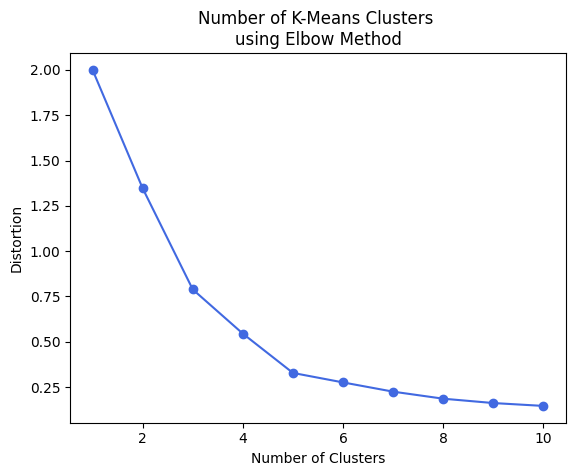

In [10]:
from scipy.spatial.distance import cdist
distortions = []
inertias = []

for i in range(1,11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km.fit(X_scaled)

    #distortions.append(km.inertia_)
    distortions.append(sum(np.min(cdist(X_scaled, km.cluster_centers_, 'euclidean'), axis=1)**2) / X.shape[0])
    inertias.append(km.inertia_)

plt.plot(range(1,11), distortions, marker='o', color='royalblue')

#tnrfont = {'fontname':'Times New Roman'} # font type for title
plt.title("Number of K-Means Clusters \nusing Elbow Method")#, fontsize=20, **tnrfont)

plt.xlabel('Number of Clusters')#, fontsize=16)
plt.ylabel('Distortion')#, fontsize=16)

#plt.xticks(fontsize = 16)
#plt.yticks(fontsize = 16)


### 2B. Determine Number of Clusters - Silhouette Score

In [11]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score


For n_clusters = 2 The average silhouette_score is : 0.3797296572360151
For n_clusters = 3 The average silhouette_score is : 0.46658474419000145
For n_clusters = 4 The average silhouette_score is : 0.49434988482196784
For n_clusters = 5 The average silhouette_score is : 0.5539423799434205
For n_clusters = 6 The average silhouette_score is : 0.5431816061680774
For n_clusters = 7 The average silhouette_score is : 0.45385450194574106
For n_clusters = 8 The average silhouette_score is : 0.4538695700421118


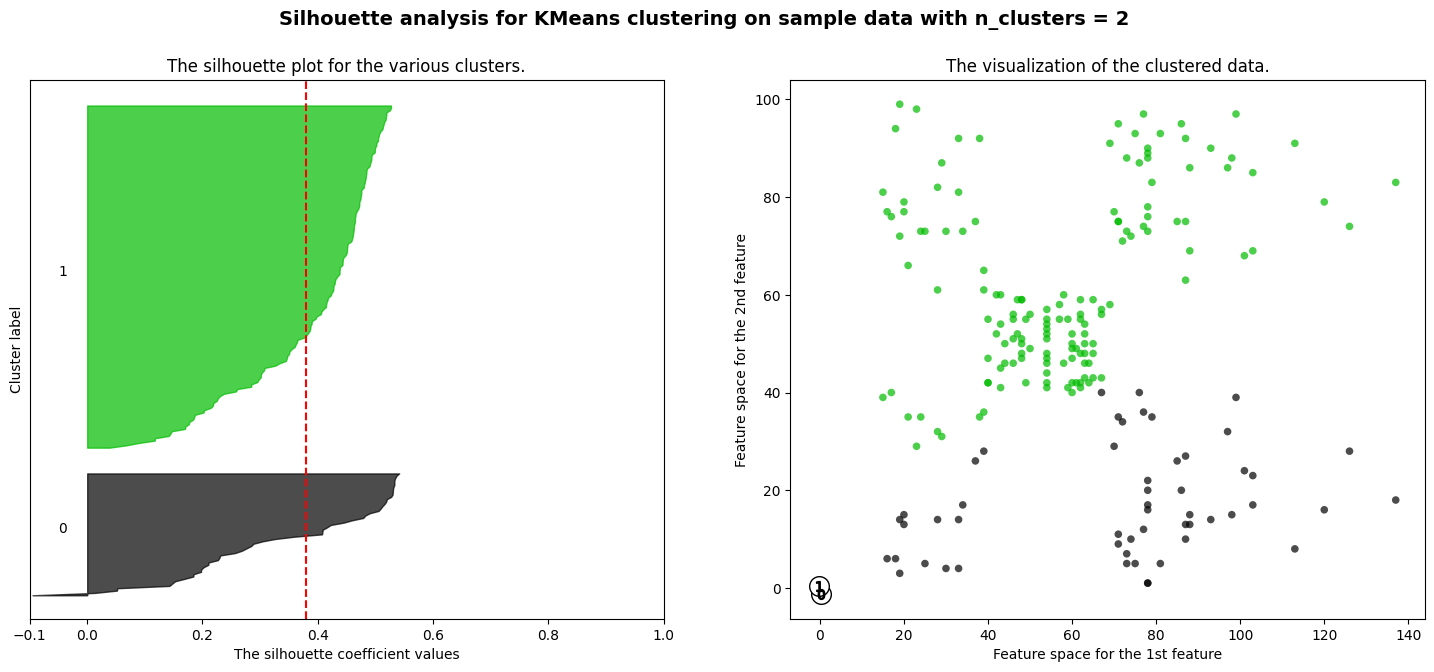

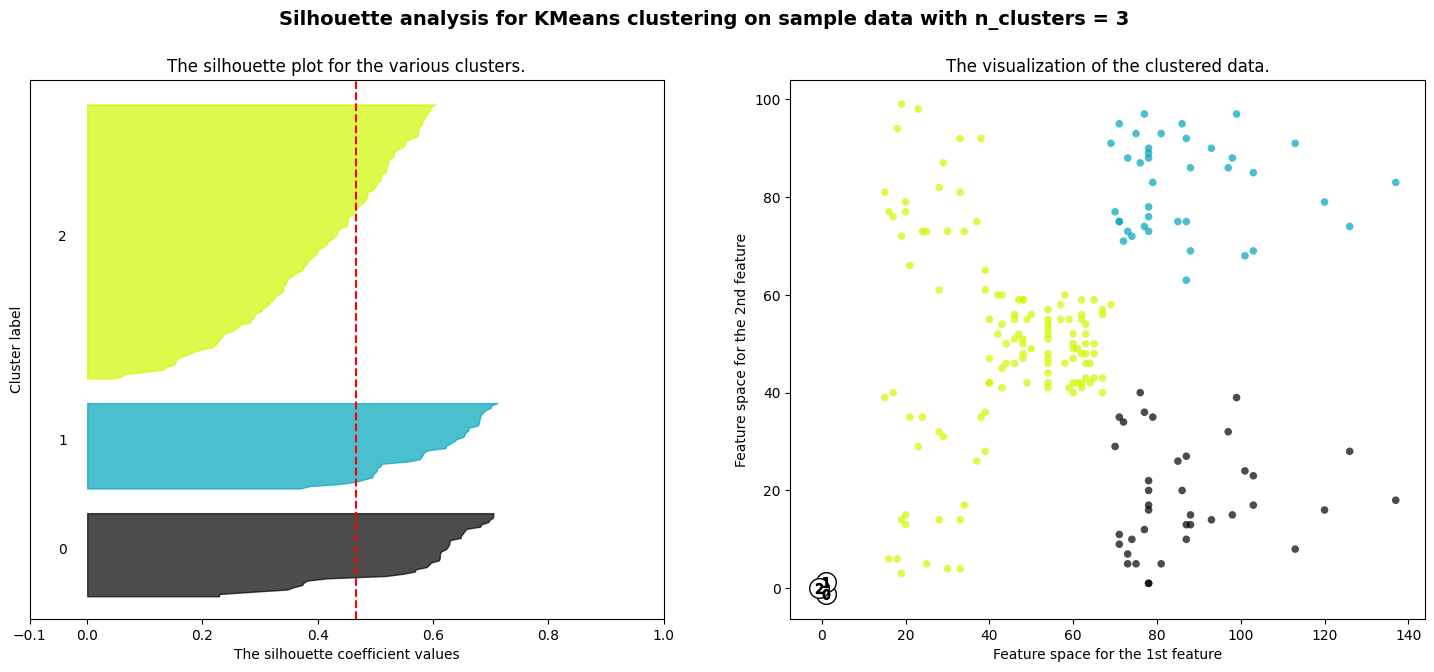

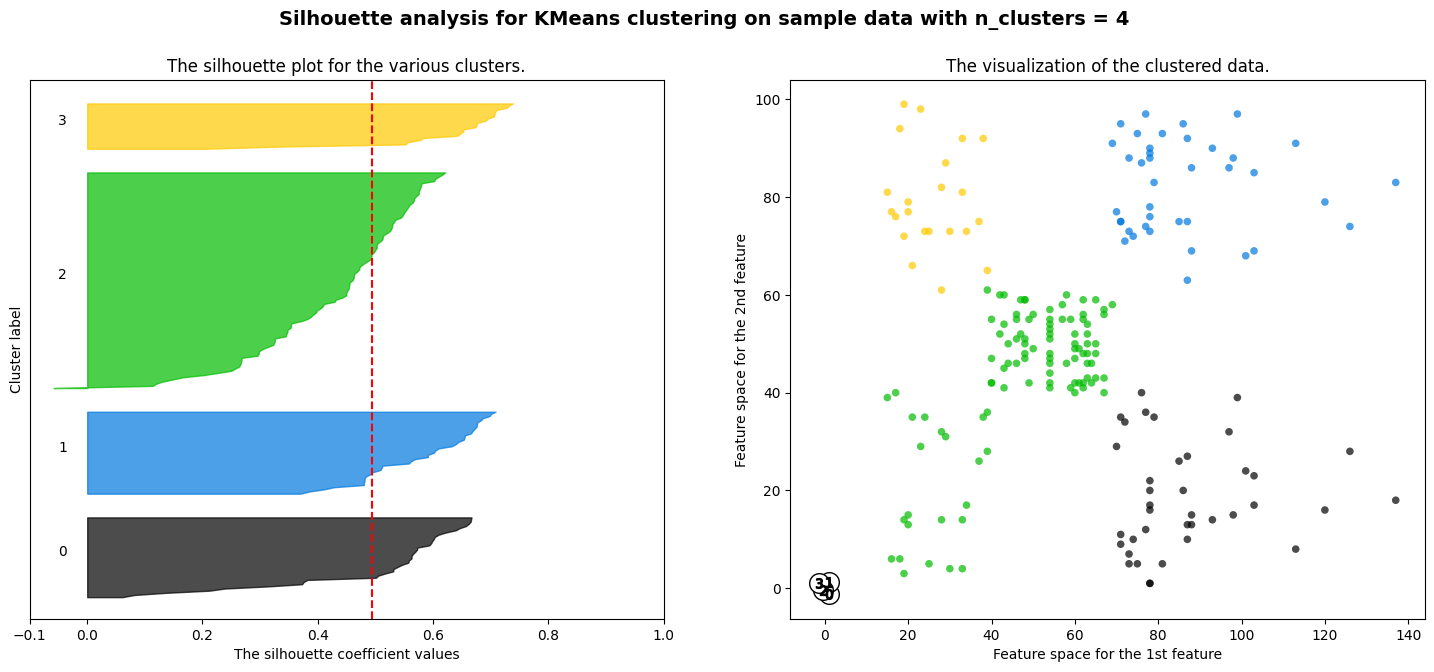

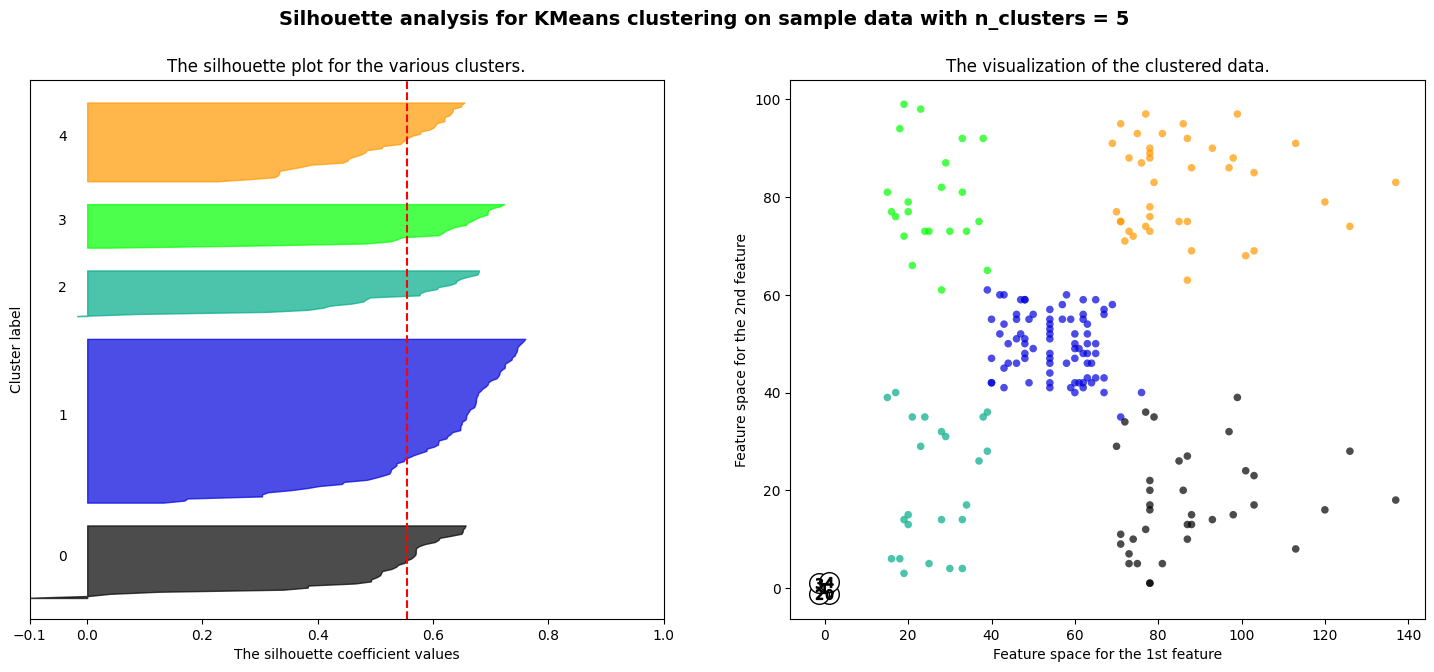

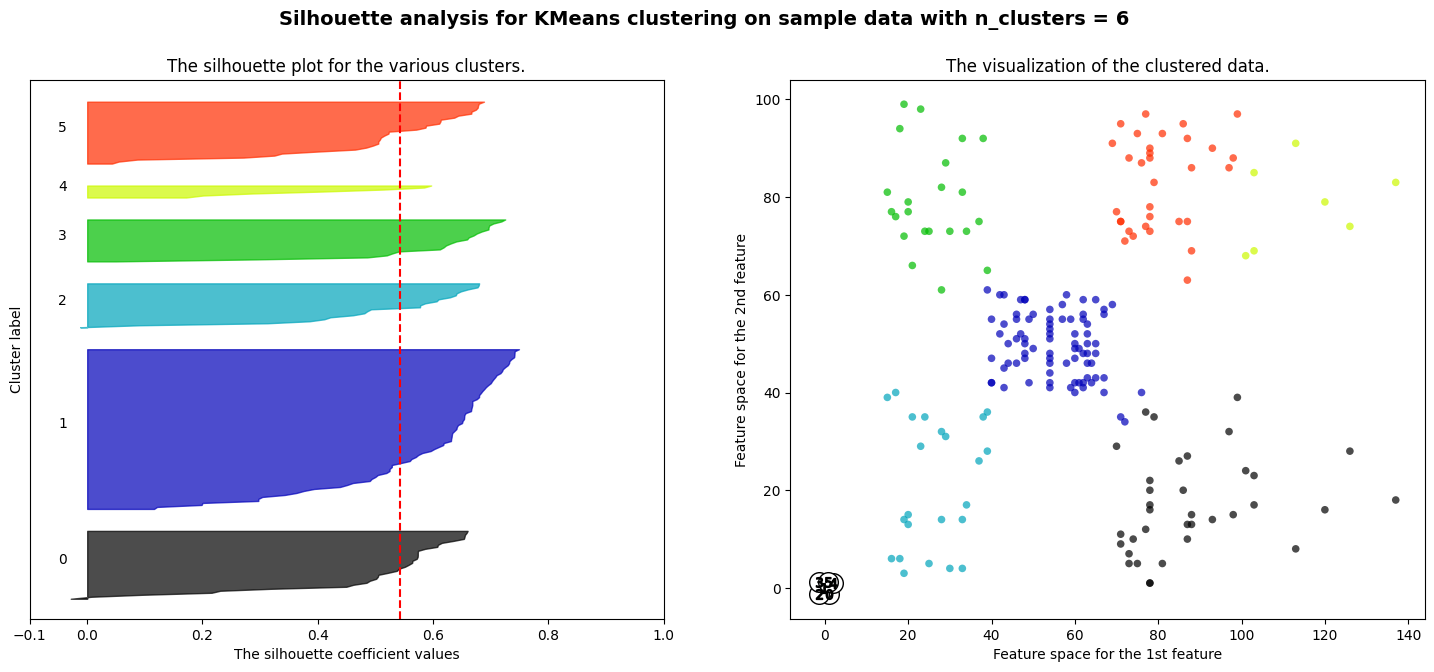

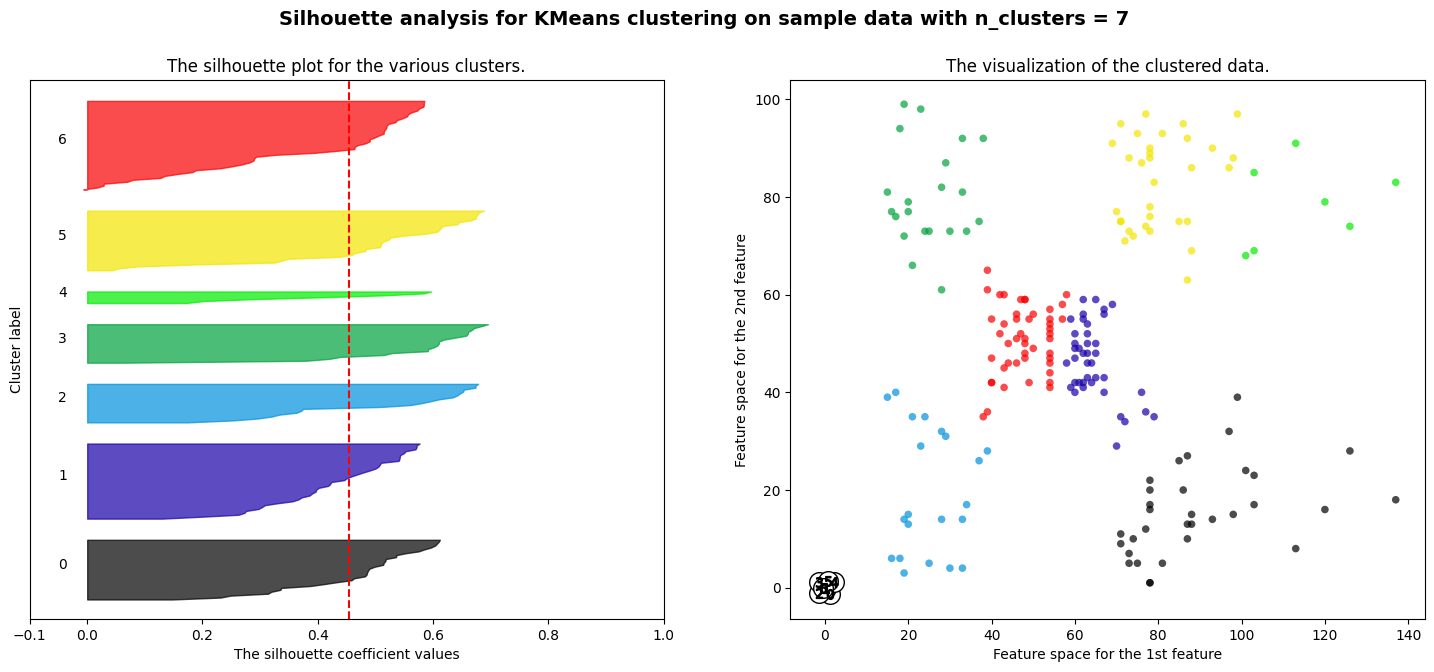

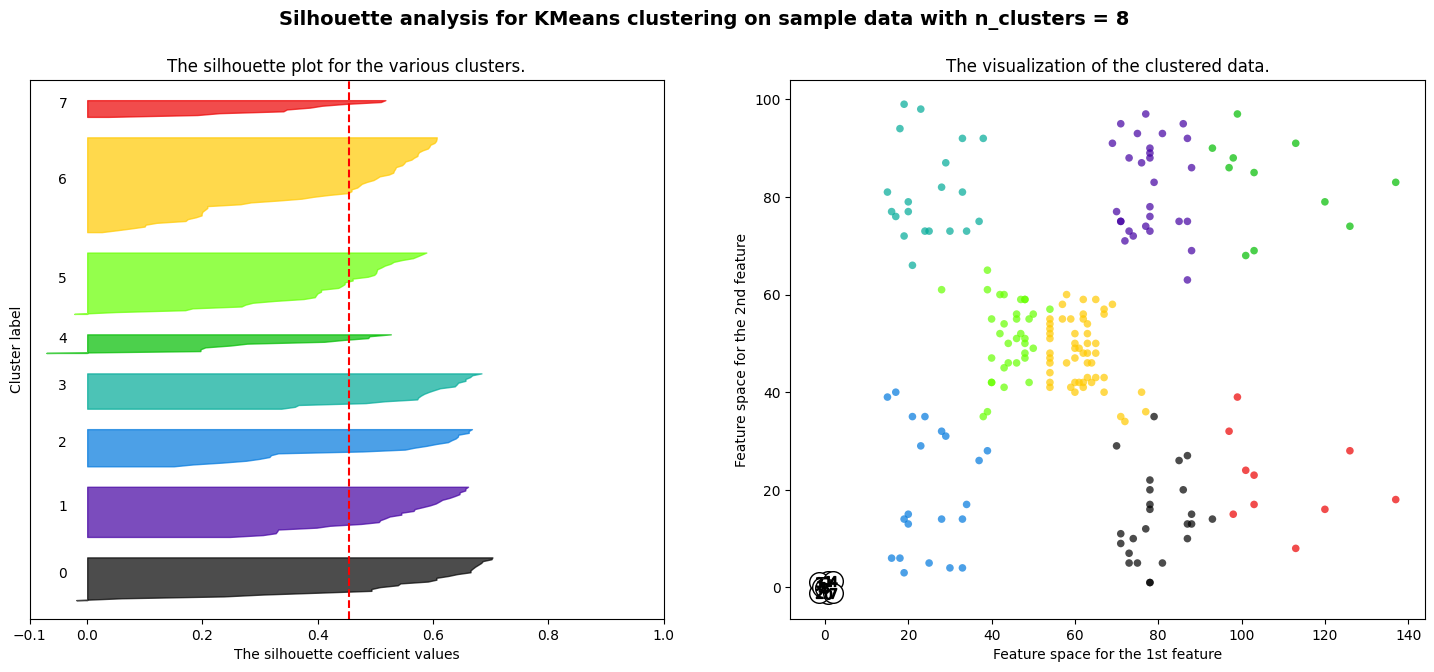

In [12]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker="o", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

### 3A. Cluster the data using K-Means, k=5

In [13]:
# K-means with k=5 clusters
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

### 4A. Plot Cluster Visualization

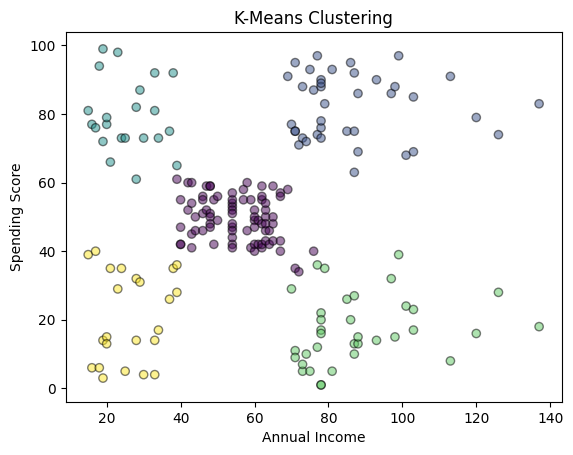

In [15]:
# Plot clusters
plt.scatter(X[:, 0], X[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.5, edgecolors='k')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('K-Means Clustering')
plt.show()